#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesperson Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 19, 2021*
**Devilry**: https://devilry.ifi.uio.no

## What to deliver?
On the Devilry website, upload one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [1]:
"""
Oblig 1 IN3050, 17.02.21

Frida Meijer
username: fridamei

Delivered as jupyter notebook with source code to run the code, 
as well as the same notebook exported to PDF as report


"""

from sys import maxsize
from time import time
from random import shuffle
import random
import csv
import itertools
import copy
import matplotlib.pyplot as plt
import numpy as np

# Function that makes a 2d-list with every city and its adjacencies
def read():
    graph = []
    with open('european_cities.csv') as file:
        reader = csv.reader(file, delimiter =';')
        counter = 0
        for row in reader:
            if counter > 0:
                graph.append(list(map(float, [row[x] for x in range(len(row))])))
            counter += 1
            if counter == len(row)+1:
                break
    return graph

"""
Cuts list to fit number of cities to run for
Makes 2d list with n inner lists
Makes n x n list by copying from indices 0 to n from n of the inner lists in cityGraph 
"""
def listOfNCities(cityGraph, n):
    nCityList = [[] for x in range(n)]
    for i in range(n):
        nCityList[i][:n] = cityGraph[i][:n] 
    return nCityList

"""
Finds the total distance in a given route (1d list) by using a cityGraph with adjacencies 
and returns the distance.
Since every city has a integer representation which is also their index in the citygraph, 
route[i] is used as a index to access the relevant city and its adjacencies
"""
def findDistance(route, cityGraph): 
    n = len(route)
    distance = 0
    for i in range(n-1):
        distance += cityGraph[route[i]][route[i+1]] 
    distance += cityGraph[route[-1]][route[0]]
    return distance

"""
Main function to find the shortest route and its length
minDistance stores the shortest distance so far
minRoute stores the shortest route

route is a list from 0 to n used as a base for all the permutations
For-loop iterates through every permutation and checks if its the shortest
"""
def exhaustive(cityList, nCities): 
    nCityList = listOfNCities(cityList, nCities)
    minDistance = maxsize
    minRoute = []
    route = [x for x in range(nCities)] 
    for cityOrder in itertools.permutations(route): 
        tempDist = findDistance(cityOrder, nCityList) 
        if tempDist < minDistance:
            minDistance = tempDist
            minRoute = cityOrder
    return minRoute, minDistance # Returns the shortest route and its distance

# Running
cities = read()

for i in range(6,11):
    t1 = time()
    route, distance = exhaustive(cities, i)
    t2= time()
    print(f"{i} CITIES\nExecution time: {t2-t1} seconds\nShortest route: {route} \nDistance travelled: {distance}\n")

# Prints the actual city names of the route, by reading the first row only to file
names = [] 
with open('european_cities.csv') as file:
    reader = csv.reader(file, delimiter =';')
    for row in reader:
        names = row
        break

routeNames = [names[each] for each in route]
for i in routeNames:
    print(i, end=" -> ")
print(names[route[0]])

6 CITIES
Execution time: 0.0 seconds
Shortest route: (0, 1, 4, 5, 2, 3) 
Distance travelled: 5018.8099999999995

7 CITIES
Execution time: 0.0 seconds
Shortest route: (2, 6, 3, 0, 1, 4, 5) 
Distance travelled: 5487.889999999999

8 CITIES
Execution time: 0.08465194702148438 seconds
Shortest route: (3, 7, 0, 1, 4, 5, 2, 6) 
Distance travelled: 6667.489999999999

9 CITIES
Execution time: 0.7711911201477051 seconds
Shortest route: (2, 6, 8, 3, 7, 0, 1, 4, 5) 
Distance travelled: 6678.549999999999

10 CITIES
Execution time: 9.042027235031128 seconds
Shortest route: (6, 8, 3, 7, 0, 1, 9, 4, 5, 2) 
Distance travelled: 7486.309999999999

Copenhagen -> Hamburg -> Brussels -> Dublin -> Barcelona -> Belgrade -> Istanbul -> Bucharest -> Budapest -> Berlin -> Copenhagen


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,

the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [ ]:
"""
The shortest route among the first 10 cities is [6, 8, 3, 7, 0, 1, 9, 4, 5, 2], 
the distance is 7486.31. 
It took aprox. 11,5 seconds to find the solution.

Route with city names: 
Copenhagen -> Hamburg -> Brussels -> Dublin -> Barcelona 
-> Belgrade -> Istanbul -> Bucharest -> Budapest -> Berlin -> Copenhagen

The permutation function runs in approx. O(n!)and is thus 
the most important component for the time complexity.
My estimation of exhaustive search with 24 cities: O(24!)/O(10!) * 9,9 = ca. 1,7*10^18
"""


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

In [2]:
 
"""
Hill climbing algorithm which stops when it has failed to improve n times in a row
minRoute is the shortest route found so far. Swaps two cities in a temporary list, 
checks the length and updates minRoute if the new route is shorter. 
If not another order of the minRoute is tried.
while-loop ensures that every iteration generates a new order
"""
def hillClimbing(cityList, nCities, maxFails=1000): 
    n = nCities
    fails = 0
    nCityList = listOfNCities(cityList, n)
    minRoute = [x for x in range(n)]
    shuffle(minRoute)
    minDistance = findDistance(minRoute, nCityList)
    while fails < maxFails:
        city1 = np.random.randint(n-1)
        city2 = np.random.randint(n-1)
        while (city1 == city2):
            city2 = np.random.randint(1, n-1)
        
        tempRoute = minRoute.copy()
        tempRoute[city1], tempRoute[city2] = tempRoute[city2], tempRoute[city1]
        tempDist = findDistance(tempRoute, nCityList)
        if tempDist < minDistance:            
            minDistance = tempDist
            fails = 0
            # minRoute = tempRoute, in case we wish to store the order of the shortest path found
        else:
            fails+=1
    return minDistance #, minRoute

# Function to run the algorithm
def runHC(nLoops, nCities, cityGraph, maxFails=500):
    results = []
    for i in range(nLoops):
        results.append(hillClimbing(cities, nCities))
    result = f"Results after 20 runs with {nCities} cities:\nMean: {np.mean(results)}\nStandard deviation: {np.std(results)}\nMin. distance: {np.min(results)}\nMax distance: {np.max(results)}\n"
    return result

nCities = 10
nLoops = 20

print(runHC(nLoops, nCities, cities))

nCities = 24
nLoops = 20

print(runHC(nLoops, nCities, cities))

# Timing tests: 
t1 = time()
hillClimbing(cities, 10)
t2= time()
print(f"RUN TIME {10} CITIES\nExecution time: {t2-t1} seconds\n")

t1 = time()
hillClimbing(cities, 24, maxFails=1000)
t2= time()
print(f"RUN TIME {24} CITIES\nExecution time: {t2-t1} seconds\n")



Results after 20 runs with 10 cities:
Mean: 9850.336
Standard deviation: 697.7669804698413
Min. distance: 8199.960000000001
Max distance: 10843.269999999999

Results after 20 runs with 24 cities:
Mean: 27463.527500000004
Standard deviation: 1846.4019627396276
Min. distance: 23295.48
Max distance: 30598.35

RUN TIME 10 CITIES
Execution time: 0.012689828872680664 seconds

RUN TIME 24 CITIES
Execution time: 0.02264261245727539 seconds



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

WITH 10 CITIES:
Population size: 100
Mean: 7510.2705000000005
Standard deviation: 64.84062410827046
Min. distance: 7486.309999999999
Max distance: 7737.950000000001


WITH 10 CITIES:
Population size: 200
Mean: 7487.989
Standard deviation: 5.036999999999959
Min. distance: 7486.309999999999
Max distance: 7503.099999999999


WITH 10 CITIES:
Population size: 500
Mean: 7487.989
Standard deviation: 5.037000000000004
Min. distance: 7486.309999999999
Max distance: 7503.099999999999


WITH 24 CITIES:
Population size: 100
Mean: 17673.832000000002
Standard deviation: 1011.7047104447024
Min. distance: 15456.160000000005
Max distance: 19750.93


WITH 24 CITIES:
Population size: 200
Mean: 17304.585499999997
Standard deviation: 1052.8170882754273
Min. distance: 15362.6
Max distance: 19339.23


WITH 24 CITIES:
Population size: 500
Mean: 16977.378999999997
Standard deviation: 971.4487030610517
Min. distance: 14555.61
Max distance: 18590.35


RUN TIME 10 CITIES
Execution time: 0.6294195652008057 seconds

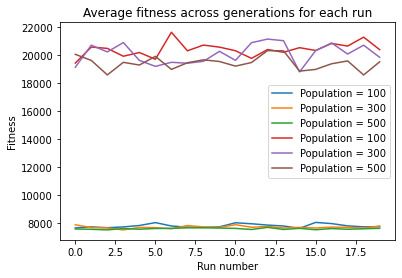

In [3]:
# route is a list with numbers from 0 to popSize. Each is shuffled to make a random population
def makePopulation(route, popSize): 
    population = [[] for i in range (popSize)] 
    for i in range(popSize):
        population[i] = copy.deepcopy(route)
        shuffle(population[i])
    return population

"""
population to be scored and cityGraph with corresponding numbers of cities to find adjacencies
lambda x applies the finDistance-function to all members of population
"""
def populationFitness(population, cityGraph):
    distances = np.array(list(map(lambda x: findDistance(x, cityGraph), population)))
    return distances 


"""
Partially mapped crossover works well with permutations to ensure every city is represented in the child.

Initialises a list with -1 to avoid conflict with actual city names
Draws two random numbers from parentRoute1 (sample ensures uniqueness), and sort them so that always a < b
Copy genes from a to b (not including b) from parent1 to child
Find the genes in parent2 not represented in the child and add them to a list (missingGenes)
For loop: Replace the uninitialised -1 values in child with the genes in missingGenes (taken from parent2)
"""

def PMX(parentRoute1, parentRoute2):
    n = len(parentRoute1)
    child = [-1 for x in range(n)]
    a, b = np.sort(random.sample(parentRoute1, 2))
    child[a:b] = parentRoute1[a:b] 
    missingGenes = [gene for gene in parentRoute2 if gene not in child]
    index = 0
    for i in range(len(child)):
        if child[i] == -1:
            child[i] = missingGenes[index]
            index+=1
    return child


"""
Inversion mutation which mutates a gene with p probability.
The gene selected for mutation is then grouped with the following gene (i+1) 
and their order is reversed.
Resembles a point mutation more than ie swap mutation because link between the 
two inversed cities is not broken and so the child after mutation varies with 
two distances from the original before the mutation instead of four as would be the case with a swap mutation
(the two cities would then each break a link with both (i-1) and (i+1)).
I believe this will give better exploitation than larger mutations, especially for lower numbers of cities

The true mutation probability for each index is higher than p, as if the city itself is not selected, 
but the following is, it will still mutate. The probability is therefore 
for a certain pair to swap rather than for each city
"""

def inversionMutation(childRoute, p):
    for i in range(len(childRoute)-1):
        if p > np.random.rand():
            childRoute[i], childRoute[i+1] = childRoute[i+1], childRoute[i]
    
    
"""
When generating a new generation, the algorithm is somewhat elitist, 
in that it will choose the same number of parents from a defined fraction 
of the top individuals (topRatio) and from the rest of the population. 
This to guarantee that the parents always include some of the best solutions thus far.

Checks the fitness of the current population and stores them in distances
Sorts the distances with argsort and stores them in indices. 
The index where the smallest number is stored in distances, is placed in indices[0] and so on
nTop is the number of individuals to select from  in the top fraction, 
nFertile is how many of them to actually pick.

Draws nFertile-number of individuals randomly from the nTop individuals and 
stores them in top. Replace false means the same individual is not chosen twice.
Draws equally many from the bottom rest of the population.

Choses one parent from the top and one from the bottom to run a PMX. 
Inversion mutation is then performed on the child, which is then stored in children

Choses equally many from the bottom rest of the list as there are children to 
be replaced by the children.
Does fitness-check and returns the shortest distance in the new generation.
"""

def newGeneration(population, cityGraph, topRatio, fertility, mutationProb): 
    distances = populationFitness(population, cityGraph) 
    indices = np.argsort(distances)   
    nTop = int(len(population)* topRatio)
    nFertile = int(nTop * fertility)
   
    top = np.random.choice(indices[:nTop], size=nFertile, replace=False)
    bottomRest = np.random.choice(indices[nTop:], size=nFertile, replace=False)
    children = []
    
    for indexTop, indexRest in zip(top, bottomRest):
        child = PMX(population[indexTop], population[indexRest])
        inversionMutation(child, p=mutationProb)
        children.append(child)
   
    removeFromPop = np.random.choice(indices[nTop:], size=nFertile, replace=False)
    for i in range(len(children)):
        population[removeFromPop[i]] = children[i]
    
    distances = populationFitness(population, cityGraph)
    return np.min(distances)
        
"""
Main function to run the algorithm.
Creates city graph with correct number of cities.
Initialise a route with numbers 0 to number of cities to 
be randomized into the first population.
genMean is the average length of the best individual from every generation.
For every generation the best individual is compared to the current 
best and stored if it is better.

The function returns the genMean and the shortest distance. 
If the genMean is high and the shortest distance is low, 
this means the genetic algorithm has done major improvements 
from the first generation to the last. 
(A high genMean and low shortest distance, means the best individuals in 
early generations was much higher than the lowest found eventually)

"""

def genetic(cityGraph, nCities, popSize, nGen, topRatio=0.15, fertility=0.8, mutationProb=0.2):
    n = nCities
    shortestDist = maxsize
    nCityList = listOfNCities(cityGraph, n) 
    route = [x for x in range(n)]
    population = makePopulation(route, popSize)

    genMean = 0
    for i in range(nGen):
        tempDist = newGeneration(population, nCityList, topRatio, fertility, mutationProb)
        genMean+=(tempDist/nGen)
        if tempDist < shortestDist:
            shortestDist = tempDist
    return shortestDist, genMean
        
def runGA(nLoops, cityGraph, nCities, popSize, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4):
    results = []
    genMeans = []
    for i in range(nLoops):
        shortestDist, genMean = genetic(cities, nCities, popSize, nGen)
        results.append(shortestDist)
        genMeans.append(genMean)
    resultString = f"WITH {nCities} CITIES:\nPopulation size: {popSize}\nMean: {np.mean(results)}\nStandard deviation: {np.std(results)}\nMin. distance: {np.min(results)}\nMax distance: {np.max(results)}\n"
    return resultString, genMeans

def plotResults(meanGen1, meanGen2, meanGen3):
    plt.title("Average fitness across generations for each run")
    plt.plot(meanGen1, label="Population = 100")
    plt.plot(meanGen2, label="Population = 300")
    plt.plot(meanGen3, label="Population = 500")
    plt.xlabel("Run number")
    plt.ylabel("Fitness")
    plt.legend()

cities = read()
n = 10
nGen = 150

popSize1 = 100
popSize2 = 200
popSize3 = 500

"""
Results with 10 cities.
Plot of mean of generation from all 20 loops
"""
results1, meanGen1 = runGA(20, cities, 10, popSize1, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)
results2, meanGen2 = runGA(20, cities, 10, popSize2, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)
results3, meanGen3 = runGA(20, cities, 10, popSize3, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)

plotResults(meanGen1, meanGen2, meanGen3)
print(f"{results1}\n")
print(f"{results2}\n")
print(f"{results3}\n")

"""
Results with 24 cities.
Plot of mean of generation from all 20 loops
"""
results12, meanGen12 = runGA(20, cities, 24, popSize1, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)
results22, meanGen22 = runGA(20, cities, 24, popSize2, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)
results32, meanGen32 = runGA(20, cities, 24, popSize3, nGen, topRatio=0.3, fertility=0.8, mutationProb=0.4)

plotResults(meanGen12, meanGen22, meanGen32)
print(f"{results12}\n")
print(f"{results22}\n")
print(f"{results32}\n")

# Timing tests with 500 generations for 10 and 24 cities: 
t1 = time()
genetic(cities, 10, popSize3, nGen)
t2= time()
print(f"RUN TIME {10} CITIES\nExecution time: {t2-t1} seconds\n")

t1 = time()
genetic(cities, 24, popSize3, nGen)
t2= time()
print(f"RUN TIME {24} CITIES\nExecution time: {t2-t1} seconds\n")


Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
"""
The final run for the report was done after the times were written in this report so they will not match exactly


After some testing, I received what seems to be good results with fertility = 0.8, 
topRatio = 0.3 and mutationProb = 0.2.
The tests are run with population size 200 for 10 cities, and 500 for 24 cities 
(because of the vast number of permutations).
I used a generation size of 150 and could probably upped this a bit, 
especially for the larger numbers of cities, but
I received good results with thsi value as well and prioritized run time

Results: 
My GA found the shortest path with all three population sizes, 
as compared to exhaustive search

The run times where as follows (for one loop) with the largest 
population size in my tests (500):

RUN TIME 10 CITIES
Execution time: 0.8623290061950684 seconds compared to approx. 10 seconds for the exhaustive search.

RUN TIME 24 CITIES
Execution time: 1.5237677097320557 seconds compared to my mathematical 
approximation of 1,7*10^18 seconds for the exhaustive search


Compared to the hill climber:
    Hill climber results: 
    Results after 20 runs with 24 cities:
    Mean: 27601.3685
    Standard deviation: 1653.1214978799203
    Min. distance: 24339.739999999998
    Max distance: 30996.510000000002

    RUN TIME 24 CITIES
    Execution time: 0.01776719093322754 seconds
    
Genetic algorithm results for 24 cities:
    WITH 24 CITIES:
    Population size: 500
    Mean: 16779.2905
    Standard deviation: 858.9128568980383
    Min. distance: 14885.66
    Max distance: 18211.0
    
    RUN TIME 24 CITIES
    Execution time: 1.5237677097320557 seconds
    
The genetic algorithm, though a bit longer run time, 
was overall much better. It found a much shorter route, and 
as the standard deviation was much lower, the consistency of the algorithm was far superior.

The exhaustive search checks n! number of routes. 
With a population of 500, the algorithm initially checks 500 x nGen routes = 500 x 150 
for this particular test
(NOTE: these are not unique routes as not all 500 are replaced each generation, 
but every member of every generation still has their fitness 
evaluated for each new population composition).



"""

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here